In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from scipy import stats 
import missingno as msno 
import warnings 
warnings.filterwarnings("ignore")
import codecs 
codecs.register_error("strict",codecs.ignore_errors)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,mean_squared_error,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\IGBOJI EBUKA ANDREW\Downloads\media.csv",header=0,sep=",")
data.head(50)

food_category food_department food_family  store_sales(in millions)  \
0   Breakfast Foods    Frozen Foods        Food                      7.36   
1   Breakfast Foods    Frozen Foods        Food                      5.52   
2   Breakfast Foods    Frozen Foods        Food                      3.68   
3   Breakfast Foods    Frozen Foods        Food                      3.68   
4   Breakfast Foods    Frozen Foods        Food                      4.08   
5   Breakfast Foods    Frozen Foods        Food                      4.08   
6   Breakfast Foods    Frozen Foods        Food                      5.44   
7   Breakfast Foods    Frozen Foods        Food                      3.74   
8   Breakfast Foods    Frozen Foods        Food                      4.08   
9   Breakfast Foods    Frozen Foods        Food                      9.72   
10  Breakfast Foods    Frozen Foods        Food                      9.72   
11  Breakfast Foods    Frozen Foods        Food                      3.28   
12  Breakfast Foods    Frozen Foods        Food                      4.08   
13  Breakfast Foods    Frozen Foods        Food                      4.92   
14  Breakfast Foods    Frozen Foods        Food                      7.48   
15  Breakfast Foods    Frozen Foods        Food                      6.56   
16  Breakfast Foods    Frozen Foods        Food                      5.61   
17  Breakfast Foods    Frozen Foods        Food                      4.92   
18  Breakfast Foods    Frozen Foods        Food                      7.36   
19  Breakfast Foods    Frozen Foods        Food                      5.52   
20  Breakfast Foods    Frozen Foods        Food                      7.36   
21  Breakfast Foods    Frozen Foods        Food                      7.36   
22  Breakfast Foods    Frozen Foods        Food                      4.92   
23  Breakfast Foods    Frozen Foods        Food                      4.08   
24  Breakfast Foods    Frozen Foods        Food                      5.44   
25  Breakfast Foods    Frozen Foods        Food                      9.72   
26  Breakfast Foods    Frozen Foods        Food                      4.92   
27  Breakfast Foods    Frozen Foods        Food                      6.48   
28  Breakfast Foods    Frozen Foods        Food                      5.61   
29  Breakfast Foods    Frozen Foods        Food                      5.61   
30  Breakfast Foods    Frozen Foods        Food                      9.72   
31  Breakfast Foods    Frozen Foods        Food                     12.96   
32  Breakfast Foods    Frozen Foods        Food                      4.92   
33  Breakfast Foods    Frozen Foods        Food                      5.44   
34  Breakfast Foods    Frozen Foods        Food                      5.61   
35  Breakfast Foods    Frozen Foods        Food                      7.48   
36  Breakfast Foods    Frozen Foods        Food                      5.61   
37  Breakfast Foods    Frozen Foods        Food                      5.44   
38  Breakfast Foods    Frozen Foods        Food                      7.48   
39  Breakfast Foods    Frozen Foods        Food                      3.28   
40  Breakfast Foods    Frozen Foods        Food                      5.52   
41  Breakfast Foods    Frozen Foods        Food                      5.52   
42  Breakfast Foods    Frozen Foods        Food                      5.52   
43  Breakfast Foods    Frozen Foods        Food                      3.68   
44  Breakfast Foods    Frozen Foods        Food                      3.68   
45  Breakfast Foods    Frozen Foods        Food                      3.68   
46  Breakfast Foods    Frozen Foods        Food                      6.48   
47  Breakfast Foods    Frozen Foods        Food                      7.48   
48  Breakfast Foods    Frozen Foods        Food                      6.48   
49  Breakfast Foods    Frozen Foods        Food                     12.96   

    store_cost(in millions)  unit_sales(in millions)           promotion_name 

In [3]:
data.tail(20)

food_category food_department     food_family  store_sales(in millions)  \
60408     Specialty        Carousel  Non-Consumable                      6.90   
60409     Specialty        Carousel  Non-Consumable                      3.20   
60410     Specialty        Carousel  Non-Consumable                      4.80   
60411     Specialty        Carousel  Non-Consumable                      3.20   
60412     Specialty        Carousel  Non-Consumable                      8.28   
60413     Specialty        Carousel  Non-Consumable                      2.42   
60414     Specialty        Carousel  Non-Consumable                      6.90   
60415     Specialty        Carousel  Non-Consumable                      9.20   
60416     Specialty        Carousel  Non-Consumable                      2.76   
60417     Specialty        Carousel  Non-Consumable                      2.97   
60418     Specialty        Carousel  Non-Consumable                      8.28   
60419     Specialty        Carousel  Non-Consumable                      6.90   
60420     Specialty        Carousel  Non-Consumable                      4.84   
60421     Specialty        Carousel  Non-Consumable                      0.99   
60422     Specialty        Carousel  Non-Consumable                      1.21   
60423     Specialty        Carousel  Non-Consumable                      2.76   
60424     Specialty        Carousel  Non-Consumable                      1.60   
60425     Specialty        Carousel  Non-Consumable                      5.52   
60426     Specialty        Carousel  Non-Consumable                      8.28   
60427     Specialty        Carousel  Non-Consumable                      9.20   

       store_cost(in millions)  unit_sales(in millions)  \
60408                   3.1740                      3.0   
60409                   1.3120                      2.0   
60410                   2.4000                      3.0   
60411                   1.0880                      2.0   
60412                   4.1400                      3.0   
60413                   1.1858                      2.0   
60414                   3.2430                      3.0   
60415                   4.6000                      4.0   
60416                   1.1592                      1.0   
60417                   1.0692                      3.0   
60418                   2.7324                      3.0   
60419                   2.8290                      3.0   
60420                   1.6940                      4.0   
60421                   0.4554                      1.0   
60422                   0.4477                      1.0   
60423                   1.3248                      1.0   
60424                   0.4960                      1.0   
60425                   2.5392                      2.0   
60426                   2.5668                      3.0   
60427                   4.2320                      4.0   

                promotion_name sales_country marital_status gender  ...  \
60408      High Roller Savings           USA              S      F  ...   
60409                Go For It           USA              S      M  ...   
60410           Price Slashers           USA              M      F  ...   
60411                Go For It           USA              S      M  ...   
60412      Shelf Clearing Days           USA              S      M  ...   
60413         Green Light Days        Mexico              S      F  ...   
60414         Price Destroyers        Mexico              M      M  ...   
60415           Shelf Emptiers        Mexico              S      M  ...   
60416             Sale Winners        Mexico              S      F  ...   
60417           Dollar Cutters        Mexico              M      F  ...   
60418             Save-It Sale        Mexico              M      M  ...   
60419             Two Day Sale        Mexico              S      M  ...   
60420            Price Winners        Mexico              S      F  ...   
60421      Gre

The above data contains sales data of various food products and brands, in various cities and supermarket across countries I am going to build a regression model to predict the unit sales of products using the data and perform other analysis to gather actionable insights.

<AxesSubplot:>

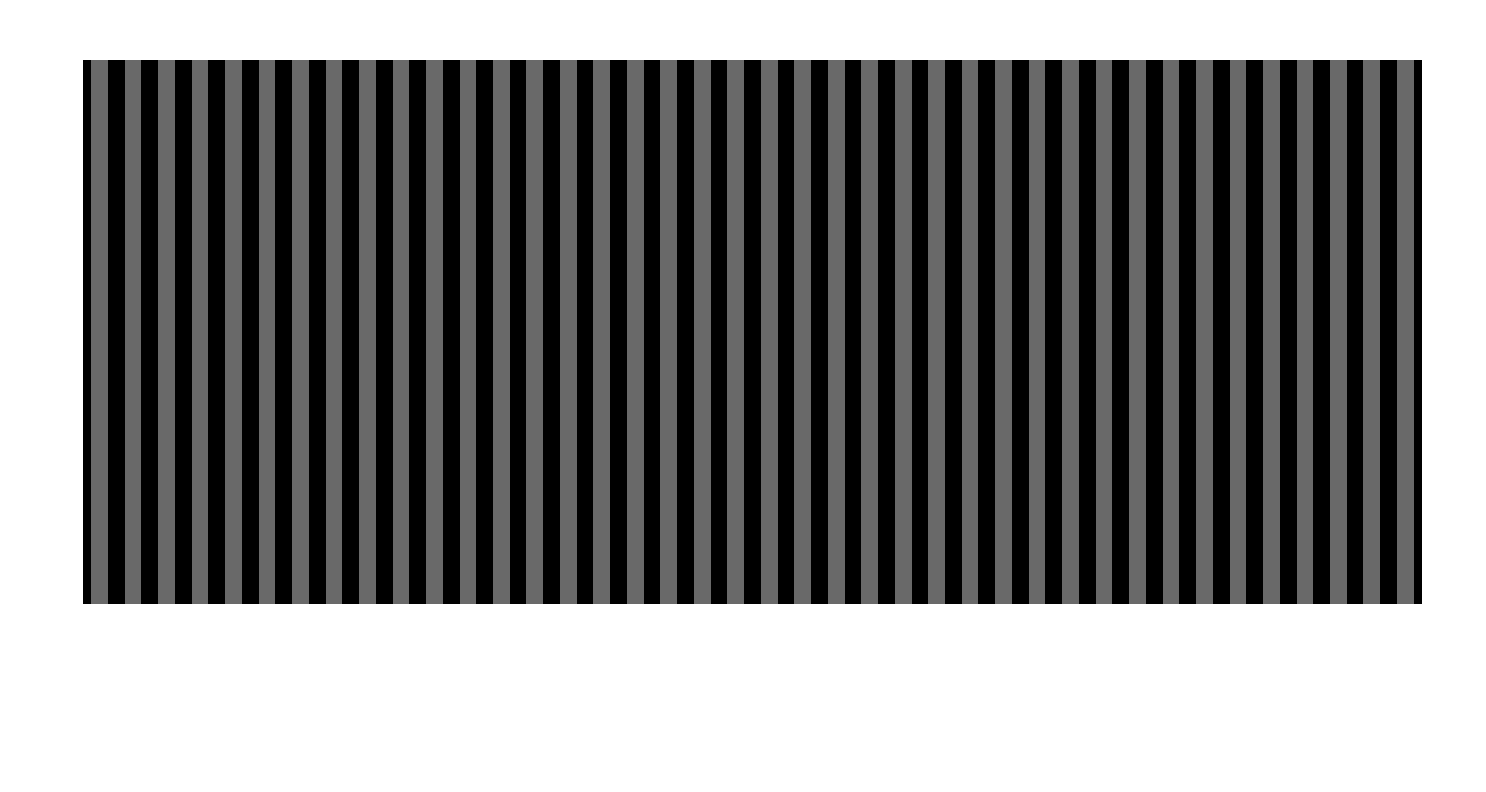

In [4]:
msno.bar(data)

In [5]:
data_null = pd.DataFrame({"null_values":data.isna().sum(),"percentage_null_values":data.isna().sum()/len(data)*100})
data_null.T

food_category  food_department  food_family  \
null_values                       0.0              0.0          0.0   
percentage_null_values            0.0              0.0          0.0   

                        store_sales(in millions)  store_cost(in millions)  \
null_values                                  0.0                      0.0   
percentage_null_values                       0.0                      0.0   

                        unit_sales(in millions)  promotion_name  \
null_values                                 0.0             0.0   
percentage_null_values                      0.0             0.0   

                        sales_country  marital_status  gender  ...  \
null_values                       0.0             0.0     0.0  ...   
percentage_null_values            0.0             0.0     0.0  ...   

                        grocery_sqft  frozen_sqft  meat_sqft  coffee_bar  \
null_values                      0.0          0.0        0.0         0.0   
percentage_null_values           0.0          0.0        0.0         0.0   

                        video_store  salad_bar  prepared_food  florist  \
null_values                     0.0        0.0            0.0      0.0   
percentage_null_values          0.0        0.0            0.0      0.0   

                        media_type  cost  
null_values                    0.0   0.0  
percentage_null_values         0.0   0.0  

[2 rows x 40 columns]

There are no missing values in the above data i will procede on data wrangling 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [7]:
data.dtypes

food_category                  object
food_department                object
food_family                    object
store_sales(in millions)      float64
store_cost(in millions)       float64
unit_sales(in millions)       float64
promotion_name                 object
sales_country                  object
marital_status                 object
gender                         object
total_children                float64
education                      object
member_card                    object
occupation                     object
houseowner                     object
avg_cars_at home(approx)      float64
avg. yearly_income             object
num_children_at_home          float64
avg_cars_at home(approx).1    float64
brand_name                     object
SRP                           float64
gross_weight                  float64
net_weight                    float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_type  

In [8]:
data.describe()

store_sales(in millions)  store_cost(in millions)  \
count              60428.000000             60428.000000   
mean                   6.541031                 2.619460   
std                    3.463047                 1.453009   
min                    0.510000                 0.163200   
25%                    3.810000                 1.500000   
50%                    5.940000                 2.385600   
75%                    8.670000                 3.484025   
max                   22.920000                 9.726500   

       unit_sales(in millions)  total_children  avg_cars_at home(approx)  \
count             60428.000000    60428.000000              60428.000000   
mean                  3.093169        2.533875                  2.200271   
std                   0.827677        1.490165                  1.109644   
min                   1.000000        0.000000                  0.000000   
25%                   3.000000        1.000000                  1.000000   
50%                   3.000000        3.000000                  2.000000   
75%                   4.000000        4.000000                  3.000000   
max                   6.000000        5.000000                  4.000000   

       num_children_at_home  avg_cars_at home(approx).1           SRP  \
count          60428.000000                60428.000000  60428.000000   
mean               0.829351                    2.200271      2.115258   
std                1.303424                    1.109644      0.932829   
min                0.000000                    0.000000      0.500000   
25%                0.000000                    1.000000      1.410000   
50%                0.000000                    2.000000      2.130000   
75%                1.000000                    3.000000      2.790000   
max                5.000000                    4.000000      3.980000   

       gross_weight    net_weight  ...    store_sqft  grocery_sqft  \
count  60428.000000  60428.000000  ...  60428.000000  60428.000000   
mean      13.806433     11.796289  ...  27988.477494  19133.799696   
std        4.622693      4.682986  ...   5701.022090   3987.395735   
min        6.000000      3.050000  ...  20319.000000  13305.000000   
25%        9.700000      7.710000  ...  23593.000000  16232.000000   
50%       13.600000     11.600000  ...  27694.000000  18670.000000   
75%       17.700000     16.000000  ...  30797.000000  22123.000000   
max       21.900000     20.800000  ...  39696.000000  30351.000000   

        frozen_sqft     meat_sqft    coffee_bar   video_store     salad_bar  \
count  60428.000000  60428.000000  60428.000000  60428.000000  60428.000000   
mean    5312.852552   3541.846280      0.612646      0.354157      0.587956   
std     1575.907263   1050.471635      0.487150      0.478261      0.492207   
min     2452.000000   1635.000000      0.000000      0.000000      0.000000   
25%     4746.000000   3164.000000      0.000000      0.000000      0.000000   
50%     5062.000000   3375.000000      1.000000      0.000000      1.000000   
75%     5751.000000   3834.000000      1.000000      1.000000      1.000000   
max     9184.000000   6122.000000      1.000000      1.000000      1.000000   

       prepared_food       florist          cost  
count   60428.000000  60428.000000  60428.000000  
mean        0.587956      0.562603     99.262366  
std         0.492207      0.496069     30.011257  
min         0.000000      0.000000     50.790000  
25%         0.000000      0.000000     69.650000  
50%         1.000000      1.000000     98.520000  
75%         1.000000      1.000000    126.620000  
max         1.000000      1.000000    149.750000  

[8 rows x 23 columns]

In [9]:
data.describe(include=object)

food_category food_department food_family    promotion_name  \
count          60428           60428       60428             60428   
unique            45              22           3                49   
top       Vegetables         Produce        Food  Weekend Markdown   
freq            7440            8521       43284              2330   

       sales_country marital_status gender            education member_card  \
count          60428          60428  60428                60428       60428   
unique             3              2      2                    5           4   
top              USA              S      F  Partial High School      Bronze   
freq           38892          30355  30942                18201       33807   

          occupation houseowner avg. yearly_income brand_name   store_type  \
count          60428      60428              60428      60428        60428   
unique             5          2                  8        111            5   
top     Professional          Y        $30K - $50K   Hermanos  Supermarket   
freq           19915      36510              19514       1839        26192   

       store_city store_state          media_type  
count       60428       60428               60428  
unique         19          10                  13  
top        Tacoma          WA  Daily Paper, Radio  
freq         5704       19370                6820

In [10]:
data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [11]:
for col in data.columns:
    print(f"{col}:\n {data[col].value_counts()}\n")

food_category:
 Vegetables              7440
Snack Foods             6919
Dairy                   3835
Meat                    3107
Fruit                   3080
Jams and Jellies        2550
Baking Goods            1947
Breakfast Foods         1946
Bread                   1797
Canned Soup             1722
Beer and Wine           1590
Paper Products          1568
Bathroom Products       1552
Electrical              1544
Candy                   1538
Frozen Desserts         1446
Specialty               1174
Starchy Foods           1103
Magazines                971
Kitchen Products         969
Eggs                     952
Hot Beverages            891
Hygiene                  831
Pain Relievers           828
Pizza                    821
Carbonated Beverages     782
Pure Juice Beverages     760
Cleaning Supplies        748
Side Dishes              601
Frozen Entrees           595
Drinks                   581
Plastic Products         578
Hardware                 575
Cold Remedies            39

In [12]:
for col in data.columns:
    print(f"{col}:\n {data[col].unique()}\n")

food_category:
 ['Breakfast Foods' 'Bread' 'Canned Shrimp' 'Baking Goods' 'Vegetables'
 'Frozen Desserts' 'Candy' 'Snack Foods' 'Dairy' 'Starchy Foods'
 'Cleaning Supplies' 'Decongestants' 'Meat' 'Hot Beverages'
 'Jams and Jellies' 'Carbonated Beverages' 'Seafood' 'Specialty'
 'Kitchen Products' 'Electrical' 'Beer and Wine' 'Candles' 'Fruit'
 'Pure Juice Beverages' 'Canned Soup' 'Paper Products' 'Canned Tuna'
 'Eggs' 'Hardware' 'Canned Sardines' 'Canned Clams' 'Pain Relievers'
 'Side Dishes' 'Bathroom Products' 'Magazines' 'Frozen Entrees' 'Pizza'
 'Cold Remedies' 'Canned Anchovies' 'Drinks' 'Hygiene' 'Plastic Products'
 'Canned Oysters' 'Packaged Vegetables' 'Miscellaneous']

food_department:
 ['Frozen Foods' 'Baked Goods' 'Canned Foods' 'Baking Goods' 'Produce'
 'Snacks' 'Snack Foods' 'Dairy' 'Starchy Foods' 'Household'
 'Health and Hygiene' 'Meat' 'Beverages' 'Seafood' 'Deli'
 'Alcoholic Beverages' 'Canned Products' 'Eggs' 'Periodicals'
 'Breakfast Foods' 'Checkout' 'Carousel']

foo

In [13]:
print("sales_country:\n{}".format(data["sales_country"].value_counts()))
print(" ")
print("sales_country:\n{}".format(data["sales_country"].value_counts()/len(data)*100))

sales_country:
USA       38892
Mexico    17572
Canada     3964
Name: sales_country, dtype: int64
 
sales_country:
USA       64.360892
Mexico    29.079235
Canada     6.559873
Name: sales_country, dtype: float64


In [14]:
print("food_category:\n{}".format(data["food_category"].value_counts()))
print("")
print("food_category:\n{}".format(data["food_category"].value_counts()/len(data)*100))

food_category:
Vegetables              7440
Snack Foods             6919
Dairy                   3835
Meat                    3107
Fruit                   3080
Jams and Jellies        2550
Baking Goods            1947
Breakfast Foods         1946
Bread                   1797
Canned Soup             1722
Beer and Wine           1590
Paper Products          1568
Bathroom Products       1552
Electrical              1544
Candy                   1538
Frozen Desserts         1446
Specialty               1174
Starchy Foods           1103
Magazines                971
Kitchen Products         969
Eggs                     952
Hot Beverages            891
Hygiene                  831
Pain Relievers           828
Pizza                    821
Carbonated Beverages     782
Pure Juice Beverages     760
Cleaning Supplies        748
Side Dishes              601
Frozen Entrees           595
Drinks                   581
Plastic Products         578
Hardware                 575
Cold Remedies            399

In [15]:
print("food_family:\n{}".format(data["food_family"].value_counts()))
print("")
print("food_family:\n{}".format(data["food_family"].value_counts()/len(data)*100))

food_family:
Food              43284
Non-Consumable    11573
Drink              5571
Name: food_family, dtype: int64

food_family:
Food              71.629046
Non-Consumable    19.151718
Drink              9.219236
Name: food_family, dtype: float64


In [16]:
print("food_department:\n{}".format(data["food_department"].value_counts()))
print(" ")
print("food_department:\n{}".format(data["food_department"].value_counts()/len(data)*100))

food_department:
Produce                8521
Snack Foods            6919
Household              6185
Frozen Foods           6126
Baking Goods           4497
Canned Foods           4238
Dairy                  3835
Health and Hygiene     3807
Beverages              3014
Deli                   2787
Baked Goods            1797
Alcoholic Beverages    1590
Snacks                 1538
Starchy Foods          1103
Periodicals             971
Eggs                    952
Breakfast Foods         778
Canned Products         400
Meat                    385
Checkout                385
Seafood                 375
Carousel                225
Name: food_department, dtype: int64
 
food_department:
Produce                14.101079
Snack Foods            11.449990
Household              10.235321
Frozen Foods           10.137685
Baking Goods            7.441914
Canned Foods            7.013305
Dairy                   6.346396
Health and Hygiene      6.300060
Beverages               4.987754
Deli           

In [17]:
print("promotion_name:\n{}".format(data["promotion_name"].value_counts()))
print("")
print("promotion_name:\n{}".format(data["promotion_name"].value_counts()/(data.shape[0])*100))

promotion_name:
Weekend Markdown           2330
Two Day Sale               2321
Price Savers               2279
Price Winners              2108
Save-It Sale               2001
Super Duper Savers         1986
Super Savers               1930
One Day Sale               1843
Double Down Sale           1755
High Roller Savings        1741
Green Light Days           1702
Shelf Clearing Days        1690
Price Slashers             1647
Free For All               1621
Cash Register Lottery      1555
Go For It                  1521
Two for One                1493
Money Savers               1489
Big Time Discounts         1480
Price Destroyers           1374
Saving Days                1353
Dollar Cutters             1326
Unbeatable Price Savers    1217
Sales Galore               1212
Big Promo                  1172
Dimes Off                  1150
Sales Days                 1107
Price Cutters              1099
You Save Days              1075
Savings Galore             1067
Bag Stuffers            

In [18]:
plt.figure(figsize=(30,12))
sns.countplot(x="food_department",data=data)

<AxesSubplot:xlabel='food_department', ylabel='count'>

<AxesSubplot:xlabel='food_family', ylabel='count'>

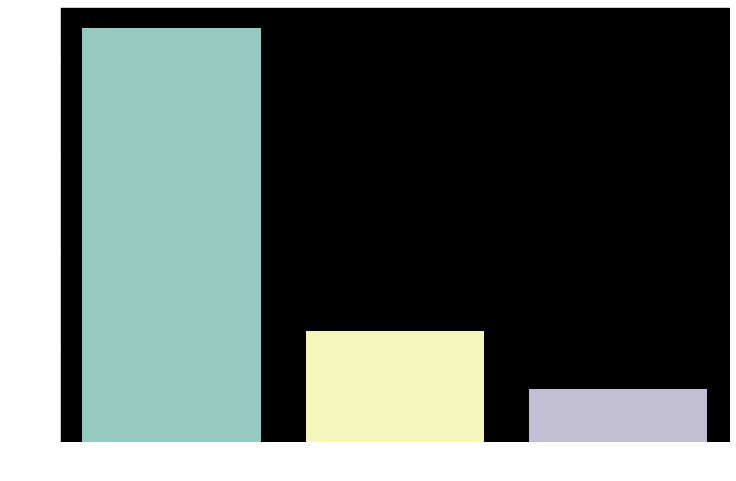

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(x="food_family",data=data)

In [20]:
fig=px.bar(data,x="food_category",color="food_family",template="plotly_dark")
fig.show()

In [21]:
fig = px.bar(data,x="promotion_name",y="unit_sales(in millions)",color="sales_country",template="plotly_dark")
fig.show()

I have built some visuals let me now group some data together to gather import information

In [22]:
data_grp1 = data.groupby(["promotion_name","food_family","sales_country"],as_index=False)["unit_sales(in millions)"].sum().sort_values(by=["unit_sales(in millions)"],ascending=False)
data_grp1.head(30)

promotion_name food_family sales_country  \
312         Weekend Markdown        Food           USA   
165             Price Savers        Food           USA   
108      High Roller Savings        Food           USA   
215             Save-It Sale        Food           USA   
40     Cash Register Lottery        Food           USA   
185            Price Winners        Food        Mexico   
84              Free For All        Food           USA   
254       Super Duper Savers        Food           USA   
68          Double Down Sale        Food           USA   
288             Two Day Sale        Food           USA   
294              Two for One        Food           USA   
287             Two Day Sale        Food        Mexico   
138             One Day Sale        Food           USA   
316            You Save Days        Food           USA   
3               Bag Stuffers        Food           USA   
173           Price Slashers        Food           USA   
300  Unbeatable Price Savers        Food           USA   
207             Sales Galore        Food           USA   
222              Saving Days        Food           USA   
57            Dollar Cutters        Food           USA   
21        Big Time Discounts        Food           USA   
15                 Big Promo        Food           USA   
50                 Dimes Off        Food        Mexico   
239      Shelf Clearing Days        Food           USA   
95          Green Light Days        Food        Mexico   
96          Green Light Days        Food           USA   
89                 Go For It        Food        Mexico   
263             Super Savers        Food           USA   
159         Price Destroyers        Food           USA   
137             One Day Sale        Food        Mexico   

     unit_sales(in millions)  
312                   4384.0  
165                   3890.0  
108                   3423.0  
215                   3394.0  
40                    3349.0  
185                   3325.0  
84                    3190.0  
254                   3132.0  
68                    2873.0  
288                   2636.0  
294                   2567.0  
287                   2492.0  
138                   2370.0  
316                   2343.0  
3                     2301.0  
173                   2296.0  
300                   2282.0  
207                   2210.0  
222                   2192.0  
57                    2138.0  
21                    2068.0  
15                    2037.0  
50                    2033.0  
239                   2008.0  
95                    1945.0  
96                    1897.0  
89                    1762.0  
263                   1755.0  
159                   1745.0  
137                   1701.0

In [23]:
data_grp2 = data.groupby(["food_family","sales_country"],as_index=False)["unit_sales(in millions)"].sum().sort_index(ascending=False).sort_values(by=["unit_sales(in millions)"],ascending=False)
data_grp2

food_family sales_country  unit_sales(in millions)
5            Food           USA                  86020.0
4            Food        Mexico                  39051.0
8  Non-Consumable           USA                  22674.0
2           Drink           USA                  11115.0
7  Non-Consumable        Mexico                  10498.0
3            Food        Canada                   8830.0
1           Drink        Mexico                   5122.0
6  Non-Consumable        Canada                   2542.0
0           Drink        Canada                   1062.0

In [24]:
data_grp3 = data.groupby(["food_family","sales_country"],as_index=False)["store_sales(in millions)"].sum().sort_values(by=["store_sales(in millions)"],ascending=False)
data_grp3

food_family sales_country  store_sales(in millions)
5            Food           USA                 182790.62
4            Food        Mexico                  83098.91
8  Non-Consumable           USA                  48682.89
7  Non-Consumable        Mexico                  22326.02
2           Drink           USA                  21945.71
3            Food        Canada                  18725.01
1           Drink        Mexico                  10140.17
6  Non-Consumable        Canada                   5459.55
0           Drink        Canada                   2092.52

In [25]:
data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [26]:
data_grp4 = data.groupby(["food_family","store_type","sales_country"],as_index=False)["store_cost(in millions)"].sum().sort_values(by=["store_cost(in millions)"],ascending=False)
data_grp4

food_family           store_type sales_country  store_cost(in millions)
21            Food          Supermarket           USA               42341.8226
13            Food   Deluxe Supermarket           USA               21254.5336
12            Food   Deluxe Supermarket        Mexico               16201.1230
32  Non-Consumable          Supermarket           USA               11268.6800
15            Food  Gourmet Supermarket           USA                7977.2668
20            Food          Supermarket        Mexico                7873.5904
11            Food   Deluxe Supermarket        Canada                6365.8255
24  Non-Consumable   Deluxe Supermarket           USA                5796.7940
10           Drink          Supermarket           USA                5208.7727
14            Food  Gourmet Supermarket        Mexico                4530.7710
23  Non-Consumable   Deluxe Supermarket        Mexico                4429.8228
17            Food     Mid-Size Grocery        Mexico                4351.9723
2            Drink   Deluxe Supermarket           USA                2488.1712
31  Non-Consumable          Supermarket        Mexico                2104.1048
26  Non-Consumable  Gourmet Supermarket           USA                2068.6182
1            Drink   Deluxe Supermarket        Mexico                1925.5545
22  Non-Consumable   Deluxe Supermarket        Canada                1898.6515
19            Food        Small Grocery           USA                1514.5464
28  Non-Consumable     Mid-Size Grocery        Mexico                1197.1714
25  Non-Consumable  Gourmet Supermarket        Mexico                1140.4086
16            Food     Mid-Size Grocery        Canada                1132.6767
9            Drink          Supermarket        Mexico                1009.1020
4            Drink  Gourmet Supermarket           USA                 944.2460
0            Drink   Deluxe Supermarket        Canada                 714.5213
3            Drink  Gourmet Supermarket        Mexico                 547.8061
6            Drink     Mid-Size Grocery        Mexico                 508.4470
18            Food        Small Grocery        Mexico                 426.2273
30  Non-Consumable        Small Grocery           USA                 366.0354
27  Non-Consumable     Mid-Size Grocery        Canada                 288.4534
8            Drink        Small Grocery           USA                 158.0779
5            Drink     Mid-Size Grocery        Canada                 123.3062
29  Non-Consumable        Small Grocery        Mexico                  91.4561
7            Drink        Small Grocery        Mexico                  40.1420

In [27]:
unit_sum = data["unit_sales(in millions)"].sum()
unit_sum

186914.0

let me view the frequency distribution of numeric data and procede with univariate and multivariate analysis of our data

array([[<AxesSubplot:title={'center':'store_sales(in millions)'}>,
        <AxesSubplot:title={'center':'store_cost(in millions)'}>,
        <AxesSubplot:title={'center':'unit_sales(in millions)'}>,
        <AxesSubplot:title={'center':'total_children'}>,
        <AxesSubplot:title={'center':'avg_cars_at home(approx)'}>],
       [<AxesSubplot:title={'center':'num_children_at_home'}>,
        <AxesSubplot:title={'center':'avg_cars_at home(approx).1'}>,
        <AxesSubplot:title={'center':'SRP'}>,
        <AxesSubplot:title={'center':'gross_weight'}>,
        <AxesSubplot:title={'center':'net_weight'}>],
       [<AxesSubplot:title={'center':'recyclable_package'}>,
        <AxesSubplot:title={'center':'low_fat'}>,
        <AxesSubplot:title={'center':'units_per_case'}>,
        <AxesSubplot:title={'center':'store_sqft'}>,
        <AxesSubplot:title={'center':'grocery_sqft'}>],
       [<AxesSubplot:title={'center':'frozen_sqft'}>,
        <AxesSubplot:title={'center':'meat_sqft'}>,
      

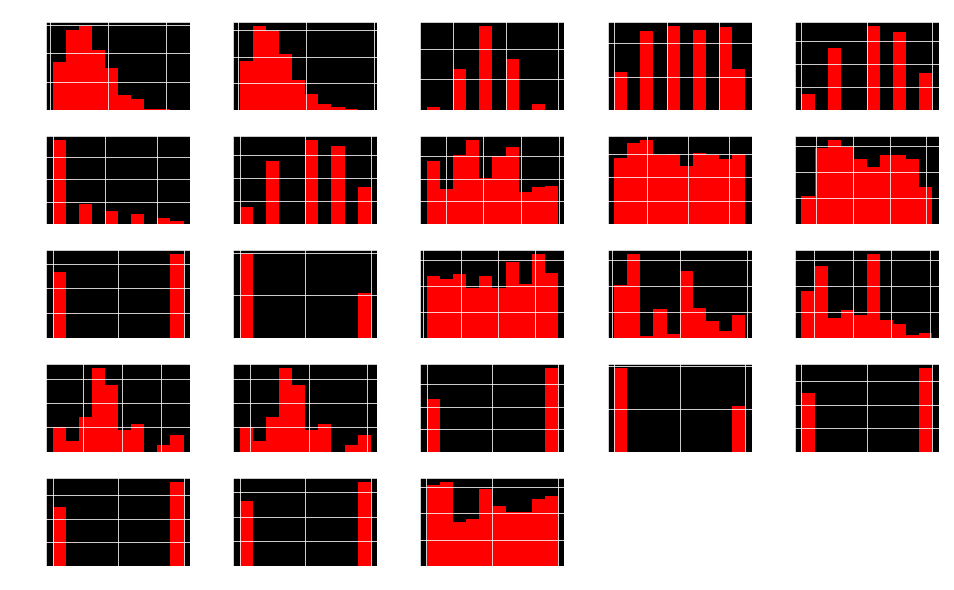

In [28]:
data.hist(figsize=(16,10),bins=10,color="red")

In [29]:
list(set(data.dtypes.tolist()))

[dtype('float64'), dtype('O')]

In [30]:
data_num = data.select_dtypes(include=["float64"])
data_num.head()

store_sales(in millions)  store_cost(in millions)  unit_sales(in millions)  \
0                      7.36                   2.7232                      4.0   
1                      5.52                   2.5944                      3.0   
2                      3.68                   1.3616                      2.0   
3                      3.68                   1.1776                      2.0   
4                      4.08                   1.4280                      3.0   

   total_children  avg_cars_at home(approx)  num_children_at_home  \
0             1.0                       1.0                   1.0   
1             0.0                       4.0                   0.0   
2             4.0                       1.0                   0.0   
3             2.0                       2.0                   2.0   
4             0.0                       2.0                   0.0   

   avg_cars_at home(approx).1   SRP  gross_weight  net_weight  ...  \
0                         1.0  1.84         19.70       17.70  ...   
1                         4.0  1.84         19.70       17.70  ...   
2                         1.0  1.84         19.70       17.70  ...   
3                         2.0  1.84         19.70       17.70  ...   
4                         2.0  1.36          7.12        5.11  ...   

   store_sqft  grocery_sqft  frozen_sqft  meat_sqft  coffee_bar  video_store  \
0     27694.0       18670.0       5415.0     3610.0         1.0          1.0   
1     27694.0       18670.0       5415.0     3610.0         1.0          1.0   
2     27694.0       18670.0       5415.0     3610.0         1.0          1.0   
3     27694.0       18670.0       5415.0     3610.0         1.0          1.0   
4     27694.0       18670.0       5415.0     3610.0         1.0          1.0   

   salad_bar  prepared_food  florist    cost  
0        1.0            1.0      1.0  126.62  
1        1.0            1.0      1.0   59.86  
2        1.0            1.0      1.0   84.16  
3        1.0            1.0      1.0   95.78  
4        1.0            1.0      1.0   50.79  

[5 rows x 23 columns]

In [31]:
data_obj = data.select_dtypes(include=["object"])
data_obj.head()

food_category food_department food_family         promotion_name  \
0  Breakfast Foods    Frozen Foods        Food           Bag Stuffers   
1  Breakfast Foods    Frozen Foods        Food  Cash Register Lottery   
2  Breakfast Foods    Frozen Foods        Food    High Roller Savings   
3  Breakfast Foods    Frozen Foods        Food  Cash Register Lottery   
4  Breakfast Foods    Frozen Foods        Food       Double Down Sale   

  sales_country marital_status gender            education member_card  \
0           USA              M      F  Partial High School      Normal   
1           USA              M      M     Bachelors Degree      Silver   
2           USA              S      F  Partial High School      Normal   
3           USA              M      F   High School Degree      Bronze   
4           USA              M      M  Partial High School      Bronze   

       occupation houseowner avg. yearly_income  brand_name  \
0  Skilled Manual          Y        $10K - $30K  Carrington   
1    Professional          Y        $50K - $70K  Carrington   
2          Manual          N        $10K - $30K  Carrington   
3          Manual          Y        $30K - $50K  Carrington   
4  Skilled Manual          N        $30K - $50K      Golden   

           store_type store_city store_state          media_type  
0  Deluxe Supermarket      Salem          OR  Daily Paper, Radio  
1  Deluxe Supermarket      Salem          OR  Daily Paper, Radio  
2  Deluxe Supermarket      Salem          OR  Daily Paper, Radio  
3  Deluxe Supermarket      Salem          OR     In-Store Coupon  
4  Deluxe Supermarket      Salem          OR               Radio

In [32]:
data_num_corr = data_num.corr()['unit_sales(in millions)'][:-1]


In [33]:
golden_features_list = data_num_corr[abs(data_num_corr)>0.1].sort_values(ascending=False)
print("unit_sales:\n{}".format(len(golden_features_list),golden_features_list))
golden_features_list

unit_sales:
4


unit_sales(in millions)     1.000000
store_sales(in millions)    0.503482
store_cost(in millions)     0.480087
total_children              0.163188
Name: unit_sales(in millions), dtype: float64

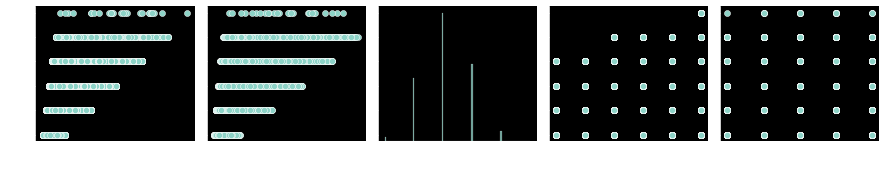

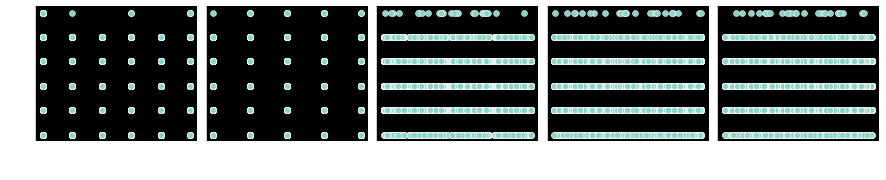

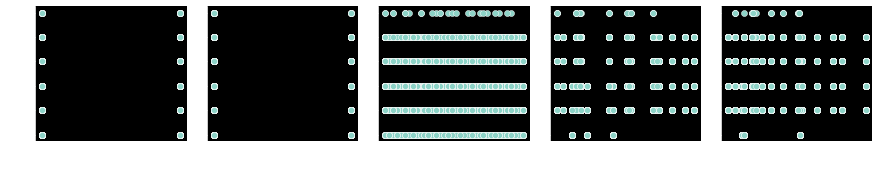

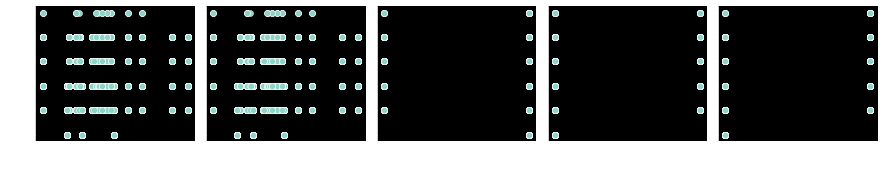

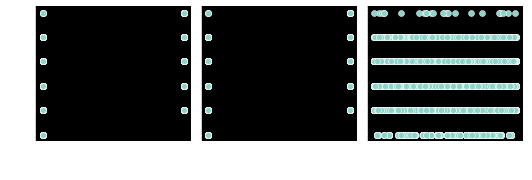

In [34]:
for i in range(0,len(data_num.columns),5):
    sns.pairplot(data=data_num,
                 x_vars=data_num.columns[i:i+5],
                 y_vars=["unit_sales(in millions)"])

In [35]:
data_rename = {
    "store_sales(in millions)":"store_sales_millions",
    "unit_sales(in millions)":"unit_sales_millions",
    "store_cost(in millions)" :"store_cost_millions"
}
data_rename = data.rename(data_rename,axis=1,inplace=True)


In [36]:
data

food_category food_department     food_family  store_sales_millions  \
0      Breakfast Foods    Frozen Foods            Food                  7.36   
1      Breakfast Foods    Frozen Foods            Food                  5.52   
2      Breakfast Foods    Frozen Foods            Food                  3.68   
3      Breakfast Foods    Frozen Foods            Food                  3.68   
4      Breakfast Foods    Frozen Foods            Food                  4.08   
...                ...             ...             ...                   ...   
60423        Specialty        Carousel  Non-Consumable                  2.76   
60424        Specialty        Carousel  Non-Consumable                  1.60   
60425        Specialty        Carousel  Non-Consumable                  5.52   
60426        Specialty        Carousel  Non-Consumable                  8.28   
60427        Specialty        Carousel  Non-Consumable                  9.20   

       store_cost_millions  unit_sales_millions         promotion_name  \
0                   2.7232                  4.0           Bag Stuffers   
1                   2.5944                  3.0  Cash Register Lottery   
2                   1.3616                  2.0    High Roller Savings   
3                   1.1776                  2.0  Cash Register Lottery   
4                   1.4280                  3.0       Double Down Sale   
...                    ...                  ...                    ...   
60423               1.3248                  1.0          You Save Days   
60424               0.4960                  1.0          Price Cutters   
60425               2.5392                  2.0       Weekend Markdown   
60426               2.5668                  3.0             Sales Days   
60427               4.2320                  4.0     Super Duper Savers   

      sales_country marital_status gender  ...  grocery_sqft frozen_sqft  \
0               USA              M      F  ...       18670.0      5415.0   
1               USA              M      M  ...       18670.0      5415.0   
2               USA              S      F  ...       18670.0      5415.0   
3               USA              M      F  ...       18670.0      5415.0   
4               USA              M      M  ...       18670.0      5415.0   
...             ...            ...    ...  ...           ...         ...   
60423           USA              M      F  ...       15321.0      4294.0   
60424           USA              S      F  ...       15321.0      4294.0   
60425           USA              M      M  ...       15321.0      4294.0   
60426        Canada              S      M  ...       27463.0      4193.0   
60427        Canada              S      F  ...       27463.0      4193.0   

      meat_sqft coffee_bar video_store  salad_bar prepared_food  florist  \
0        3610.0        1.0         1.0        1.0           1.0      1.0   
1        3610.0        1.0         1.0        1.0           1.0      1.0   
2        3610.0        1.0         1.0        1.0           1.0      1.0   
3        3610.0        1.0         1.0        1.0           1.0      1.0   
4        3610.0        1.0         1.0        1.0           1.0      1.0   
...         ...        ...         ...        ...           ...      ...   
60423    2863.0        1.0         0.0        0.0           0.0      0.0   
60424    2863.0        1.0         0.0        0.0           0.0      0.0   
60425    2863.0        1.0         0.0        0.0           0.0      0.0   
60426    2795.0        1.0         0.0        0.0           0.0      1.0   
60427    2795.0        1.0         0.0        0.0           0.0      1.0   

                    media_type    cost  
0           Daily Paper, Radio  126.62  
1           Daily Paper, Radio   59.86  
2           Daily Paper, Radio   84.16  
3              In-Store Coupon   95.78  
4                        Radio   50.79  
...                        ...     ...  
60423          In-Store Coupon   95.25  
60424

In [37]:
data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales_millions', 'store_cost_millions', 'unit_sales_millions',
       'promotion_name', 'sales_country', 'marital_status', 'gender',
       'total_children', 'education', 'member_card', 'occupation',
       'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name',
       'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type',
       'cost'],
      dtype='object')

In [38]:
data_corr = data.corr()
data_corr

store_sales_millions  store_cost_millions  \
store_sales_millions                    1.000000             0.954685   
store_cost_millions                     0.954685             1.000000   
unit_sales_millions                     0.503482             0.480087   
total_children                          0.083313             0.079058   
avg_cars_at home(approx)                0.004498             0.002865   
num_children_at_home                    0.032437             0.027576   
avg_cars_at home(approx).1              0.004498             0.002865   
SRP                                     0.833478             0.795880   
gross_weight                            0.036179             0.034237   
net_weight                              0.032014             0.030257   
recyclable_package                      0.034293             0.030213   
low_fat                                -0.006134            -0.005976   
units_per_case                         -0.010630            -0.009792   
store_sqft                              0.015543             0.017877   
grocery_sqft                            0.010442             0.012884   
frozen_sqft                             0.017886             0.019245   
meat_sqft                               0.017883             0.019242   
coffee_bar                             -0.029368            -0.027126   
video_store                             0.019179             0.019252   
salad_bar                               0.031459             0.033206   
prepared_food                           0.031459             0.033206   
florist                                 0.030603             0.030929   
cost                                   -0.004621            -0.004162   

                            unit_sales_millions  total_children  \
store_sales_millions                   0.503482        0.083313   
store_cost_millions                    0.480087        0.079058   
unit_sales_millions                    1.000000        0.163188   
total_children                         0.163188        1.000000   
avg_cars_at home(approx)               0.023667        0.098110   
num_children_at_home                   0.066725        0.394709   
avg_cars_at home(approx).1             0.023667        0.098110   
SRP                                   -0.002358        0.000545   
gross_weight                           0.001255       -0.000186   
net_weight                             0.001137        0.000142   
recyclable_package                     0.001599        0.002794   
low_fat                               -0.001129       -0.002824   
units_per_case                         0.000084        0.002307   
store_sqft                             0.031464        0.000555   
grocery_sqft                           0.024857        0.018526   
frozen_sqft                            0.030563       -0.026926   
meat_sqft                              0.030557       -0.026923   
coffee_bar                            -0.057633        0.002836   
video_store                            0.034996       -0.000591   
salad_bar                              0.057878       -0.013764   
prepared_food                          0.057878       -0.013764   
florist                                0.055885       -0.003361   
cost                                  -0.015015       -0.003900   

                            avg_cars_at home(approx)  num_children_at_home  \
store_sales_millions                        0.004498              0.032437   
store_cost_millions                         0.002865              0.027576   
unit_sales_millions                         0.023667              0.066725   
total_children                              0.098110              0.394709   
avg_cars_at home(approx)                    1.000000              0.130841   
num_children_at_home                        0.130841              1.000000   
avg_cars_at home(approx).1                  1.000000              0.130841   
SRP                                       

<AxesSubplot:>

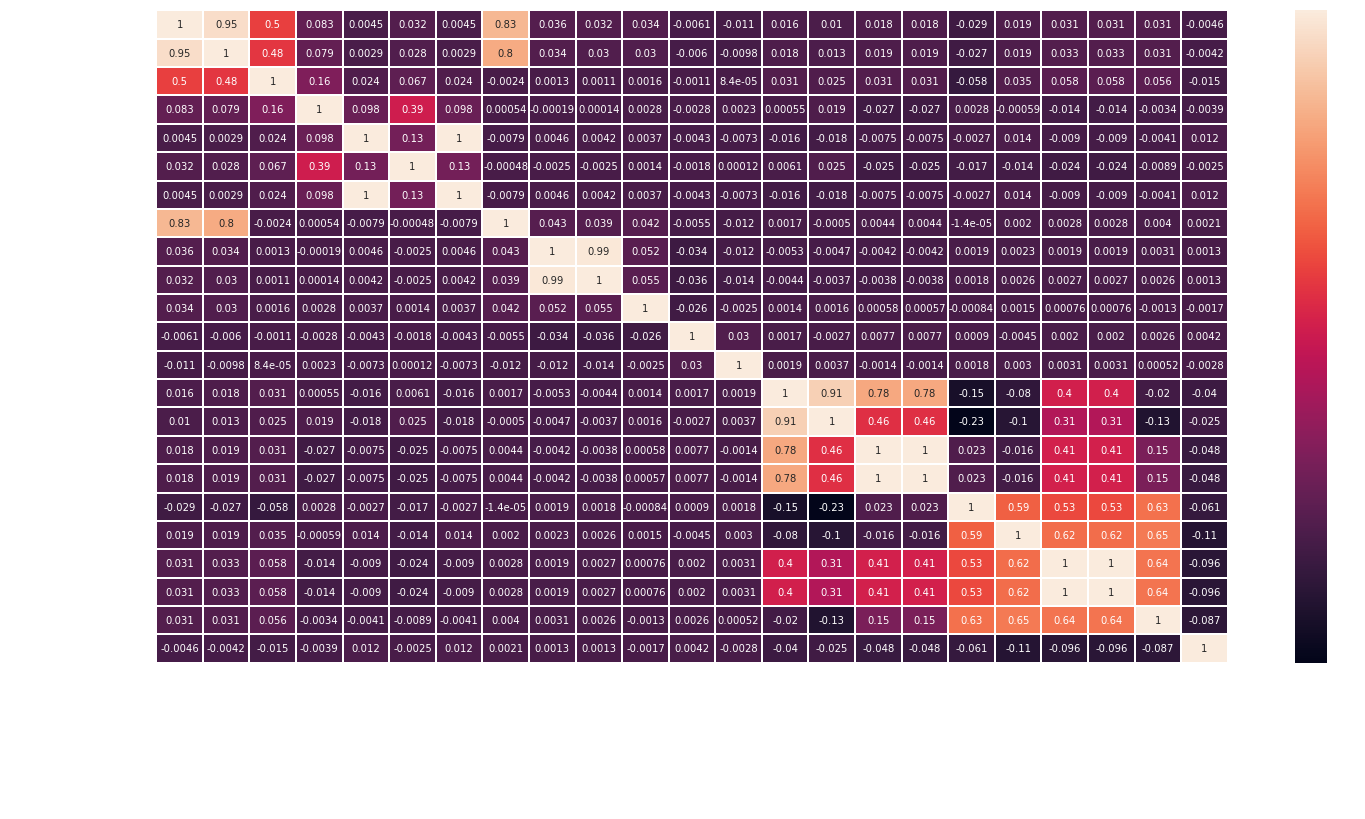

In [39]:
plt.figure(figsize=(24,12))
sns.heatmap(data_corr,annot=True,linewidths=1)

In [40]:
data_drp = data.drop(columns=['food_category', 'food_department',
       'promotion_name', 'sales_country', 'marital_status', 'gender',
       'education', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'gross_weight', 'net_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_city',
       'store_state', 'store_sqft', 'frozen_sqft', 'meat_sqft', 'video_store',
       'salad_bar', 'media_type'],axis=1,inplace=True)
data_drp

In [41]:
data.columns

Index(['food_family', 'store_sales_millions', 'store_cost_millions',
       'unit_sales_millions', 'total_children', 'member_card', 'occupation',
       'brand_name', 'SRP', 'store_type', 'grocery_sqft', 'coffee_bar',
       'prepared_food', 'florist', 'cost'],
      dtype='object')

Building a simple linear Regression model using our stats function in python 

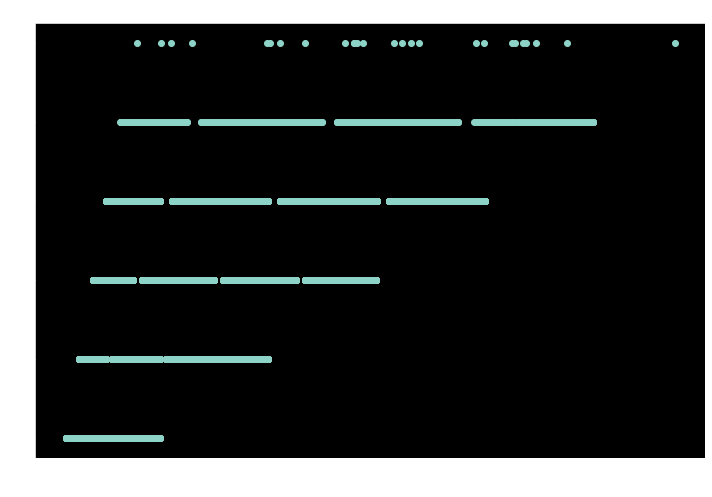

In [42]:
x = data["store_sales_millions"],
y = data["unit_sales_millions"]
slope,intercept,r,p,std_err = stats.linregress(x,y)
def myfunc(X):
    return slope * X + intercept
mymodel = list(map(myfunc,x))
plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.plot(x,mymodel)
plt.xlabel("sales_millions")
plt.ylabel("unit_sales")
plt.title("Regression_Model")
plt.show()

In [43]:
print(r,p,slope,intercept,std_err)

0.5034818282068523 nan 0.12033343427497405 2.3060640481509527 nan


In [44]:
pred = myfunc(6.48)
pred

3.0858247022527845

Building a mutiple regression using machine learning linear regression Algorithm 

In [45]:
numeric_column = [c for c in data.columns if data[c].dtypes !="O"]
print(numeric_column)


['store_sales_millions', 'store_cost_millions', 'unit_sales_millions', 'total_children', 'SRP', 'grocery_sqft', 'coffee_bar', 'prepared_food', 'florist', 'cost']


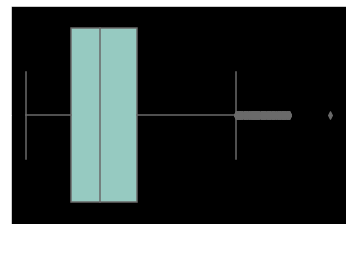

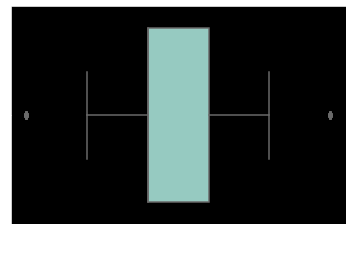

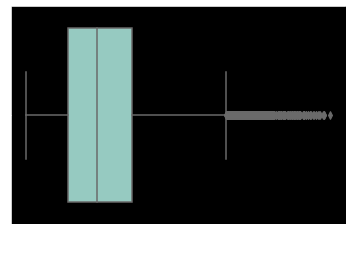

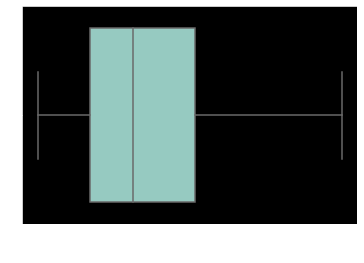

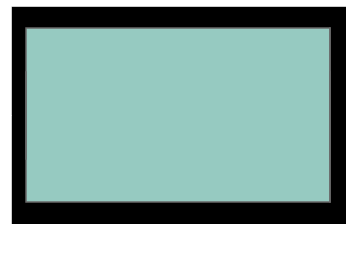

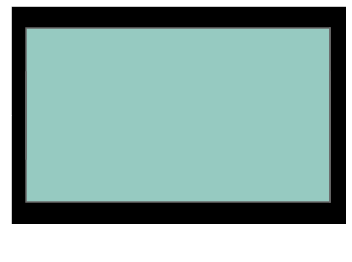

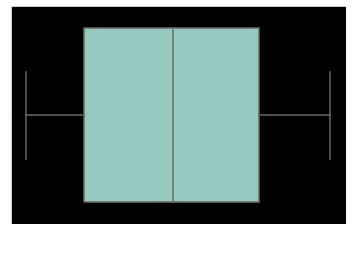

In [46]:
col_list = ['store_sales_millions', 'unit_sales_millions','store_cost_millions', 'total_children', 'SRP', 'grocery_sqft', 'coffee_bar', 'prepared_food', 'florist', 'cost']
for col in col_list:
    sns.boxplot(x=data[col])
    plt.xlabel(col)
    plt.show()

In [47]:
data_table = data["store_sales_millions"]
Q1 = data_table.quantile(0.25)
Q3 = data_table.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q1 + 1.5*IQR
print("lower band is " + str(lower_bound))
print('upper band is ' + str(upper_bound))
print("Q1:",Q1)
print("Q2:",Q3)

lower band is -3.479999999999999
upper band is 11.1
Q1: 3.81
Q2: 8.67


In [48]:
outlier_vector = (data_table < (lower_bound))|(data_table > (upper_bound))
outlier_vector.tail()

60423    False
60424    False
60425    False
60426    False
60427    False
Name: store_sales_millions, dtype: bool

In [49]:
outlier_vector = data_table[outlier_vector]
outlier_vector.index.values

array([   31,    49,    51, ..., 60170, 60215, 60269], dtype=int64)

In [50]:
data_table = data.copy()
data_table["store_sales_millions"].iloc[outlier_vector.index.values] = data_table["store_sales_millions"].mean()

In [51]:
data = data_table

<AxesSubplot:xlabel='store_sales_millions'>

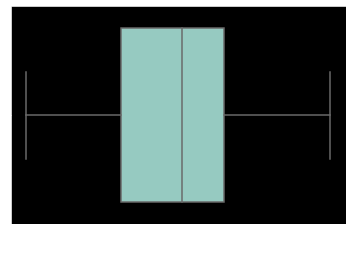

In [52]:
sns.boxplot(x=data["store_sales_millions"])

In [53]:
data_table1 = data["unit_sales_millions"]
Q1 = data_table1.quantile(0.25)
Q3 = data_table1.quantile(0.75)
IQR = Q3-Q1
lower_bound1 = Q1 - 1.5*IQR
upper_bound1 = Q3 + 1.5*IQR
print("lower bound is " + str(lower_bound1))
print("upper bound is " + str(upper_bound1))
print("Q1:",Q1)
print("Q3:",Q3)

lower bound is 1.5
upper bound is 5.5
Q1: 3.0
Q3: 4.0


In [54]:
outlier_vector1  = (data_table1 < (lower_bound1)) | (data_table1 > (upper_bound))
outlier_vector1.head()


0    False
1    False
2    False
3    False
4    False
Name: unit_sales_millions, dtype: bool

In [55]:
outlier_vector1 = data_table1[outlier_vector1]
outlier_vector1.index.values

array([  111,   112,   189,   627,   631,   632,   633,   634,   951,
         953,   954,   955,   981,   983,  1094,  1096,  1097,  1613,
        1614,  1615,  1616,  1619,  1911,  1912,  1915,  1938,  1940,
        1942,  1943,  4619,  4620,  4621,  4624,  4626,  4628,  4629,
        4630,  4631,  4632,  4633,  4634,  4635,  4636,  4638,  4642,
        4643,  4644,  4645,  4646,  4651,  4652,  4653,  4658,  4662,
        4663,  4664,  4668,  4669,  4670,  6438,  6441,  6443,  6445,
        6448,  6450,  6451,  6454,  6455,  6461,  6463,  6568,  6569,
        6577,  6579,  6580,  6586,  6589,  6592,  6596,  6597,  6598,
        6599,  6602,  6605,  6608,  6609,  6610,  6612,  6613,  6615,
        6617,  6618,  6622,  6624,  7140,  7143,  7144,  7420,  7421,
        7423,  7424,  7425,  7451,  7452,  7453,  7454,  7456,  7457,
        7987,  7990,  7992,  7994,  7996,  8364,  8365,  8373,  8399,
        8402,  8403,  8406,  8407,  8409,  9398,  9403,  9405,  9406,
        9410,  9414,

In [56]:
data_table1 = data.copy()
data_table1["unit_sales_millions"].iloc[outlier_vector1.index.values] = data_table1["unit_sales_millions"].mean() 

In [57]:
data = data_table1

<AxesSubplot:xlabel='unit_sales_millions'>

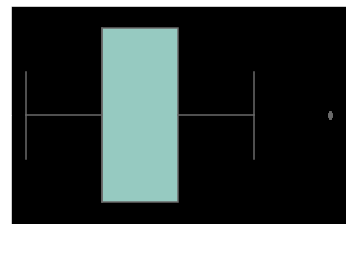

In [58]:
sns.boxplot(x=data["unit_sales_millions"])

In [59]:
data_table2 = data["store_cost_millions"]
Q1 = data_table2.quantile(0.25)
Q3 = data_table2.quantile(0.75)
IQR = Q3 - Q1
lower_bound2 = Q1 -1.5*IQR
upper_bound2 = Q1 + 1.5*IQR
print("lower bound2 is " + str(lower_bound2))
print("upper_bound is " + str(upper_bound2))
print("Q1:",Q1)
print("Q3:",Q3)

lower bound2 is -1.4760375
upper_bound is 4.4760375
Q1: 1.5
Q3: 3.484025


In [60]:
outlier_vector2 = (data_table2 < (lower_bound2)) | (data_table2 > (upper_bound2))
outlier_vector2.head()

0    False
1    False
2    False
3    False
4    False
Name: store_cost_millions, dtype: bool

In [61]:
outlier_vector2 = data[outlier_vector2]
outlier_vector2.index.values

array([    9,    31,    51, ..., 60354, 60377, 60415], dtype=int64)

In [62]:
data_table2 = data.copy()
data_table2["store_cost_millions"].iloc[outlier_vector2.index.values] = data["store_cost_millions"].mean()

In [63]:
data = data_table2

<AxesSubplot:xlabel='store_cost_millions'>

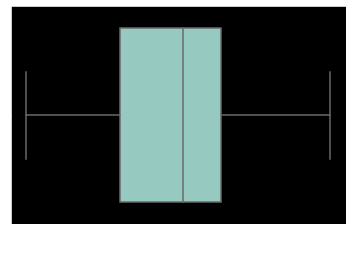

In [64]:
sns.boxplot(x=data["store_cost_millions"])

preparing data for machine learning model after deleting outliers in the above code 

In [65]:
data.columns

Index(['food_family', 'store_sales_millions', 'store_cost_millions',
       'unit_sales_millions', 'total_children', 'member_card', 'occupation',
       'brand_name', 'SRP', 'store_type', 'grocery_sqft', 'coffee_bar',
       'prepared_food', 'florist', 'cost'],
      dtype='object')

In [66]:
data_drp1 = data.drop(columns=["brand_name"],axis=1,inplace=True)

In [67]:
total_column = data.columns
print(len(total_column))

14


In [68]:
column_label = ["A" + str(s) for s in range(1,15)]
column_label

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14']

In [69]:
data.columns = column_label

In [70]:
numeric_columns = [c for c in data.columns if data[c].dtypes !="O"]
ordinal_column = [c for c in data.columns if data[c].dtypes == "O"]
print("numeric_column:\n",numeric_columns)
print("ordinal_column:\n",ordinal_column)

numeric_column:
 ['A2', 'A3', 'A4', 'A5', 'A8', 'A10', 'A11', 'A12', 'A13', 'A14']
ordinal_column:
 ['A1', 'A6', 'A7', 'A9']


In [71]:
cols = ['A2', 'A3', 'A4', 'A5', 'A8', 'A10', 'A11', 'A12', 'A13', 'A14']
data[cols] = data[cols].applymap(lambda x: float(x) if isinstance(x,str)else x).astype(float)
data.head(15)

A1    A2       A3   A4   A5      A6              A7    A8  \
0   Food  7.36  2.72320  4.0  1.0  Normal  Skilled Manual  1.84   
1   Food  5.52  2.59440  3.0  0.0  Silver    Professional  1.84   
2   Food  3.68  1.36160  2.0  4.0  Normal          Manual  1.84   
3   Food  3.68  1.17760  2.0  2.0  Bronze          Manual  1.84   
4   Food  4.08  1.42800  3.0  0.0  Bronze  Skilled Manual  1.36   
5   Food  4.08  1.46880  3.0  2.0  Bronze    Professional  1.36   
6   Food  5.44  2.55680  4.0  4.0  Bronze  Skilled Manual  1.36   
7   Food  3.74  1.60820  2.0  1.0  Bronze          Manual  1.87   
8   Food  4.08  1.46880  3.0  2.0  Normal  Skilled Manual  1.36   
9   Food  9.72  2.61946  3.0  3.0  Bronze    Professional  3.24   
10  Food  9.72  4.08240  3.0  2.0  Bronze    Professional  3.24   
11  Food  3.28  1.54160  2.0  1.0  Bronze    Professional  1.64   
12  Food  4.08  1.34640  3.0  4.0  Bronze  Skilled Manual  1.36   
13  Food  4.92  2.31240  3.0  0.0  Normal  Skilled Manual  1.64   
14  Food  7.48  3.14160  4.0  4.0  Bronze    Professional  1.87   

                    A9      A10  A11  A12  A13     A14  
0   Deluxe Supermarket  18670.0  1.0  1.0  1.0  126.62  
1   Deluxe Supermarket  18670.0  1.0  1.0  1.0   59.86  
2   Deluxe Supermarket  18670.0  1.0  1.0  1.0   84.16  
3   Deluxe Supermarket  18670.0  1.0  1.0  1.0   95.78  
4   Deluxe Supermarket  18670.0  1.0  1.0  1.0   50.79  
5   Deluxe Supermarket  18670.0  1.0  1.0  1.0   50.79  
6   Deluxe Supermarket  18670.0  1.0  1.0  1.0   95.78  
7   Deluxe Supermarket  18670.0  1.0  1.0  1.0   59.86  
8   Deluxe Supermarket  18670.0  1.0  1.0  1.0   59.86  
9   Deluxe Supermarket  18670.0  1.0  1.0  1.0   84.16  
10  Deluxe Supermarket  18670.0  1.0  1.0  1.0   66.27  
11  Deluxe Supermarket  18670.0  1.0  1.0  1.0   82.62  
12  Deluxe Supermarket  18670.0  1.0  1.0  1.0   53.45  
13  Deluxe Supermarket  18670.0  1.0  1.0  1.0  126.62  
14  Deluxe Supermarket  18670.0  1.0  1.0  1.0   80.29

In [72]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(labels=["A3"],axis=1),data["A3"],test_size=0.03,random_state=10)
X_train_dummy = pd.get_dummies(X_train,drop_first=True,sparse=False)
X_test_dummy = pd.get_dummies(X_test,drop_first=True,sparse=False)
X_train_dummy.head()

A2   A4   A5    A8      A10  A11  A12  A13     A14  A1_Food  ...  \
7829   6.30  3.0  3.0  2.10  14210.0  0.0  0.0  1.0  101.84        1  ...   
19335  6.16  4.0  0.0  1.54  22123.0  1.0  1.0  1.0   73.05        1  ...   
44981  6.44  4.0  4.0  1.61  27463.0  1.0  0.0  1.0   52.77        0  ...   
54207  2.96  2.0  1.0  1.48  16844.0  1.0  1.0  1.0  147.82        1  ...   
25817  5.80  2.0  3.0  2.90  15337.0  1.0  1.0  1.0   85.88        1  ...   

       A6_Normal  A6_Silver  A7_Management  A7_Manual  A7_Professional  \
7829           0          0              0          1                0   
19335          0          0              0          0                1   
44981          1          0              0          1                0   
54207          0          0              0          0                1   
25817          1          0              1          0                0   

       A7_Skilled Manual  A9_Gourmet Supermarket  A9_Mid-Size Grocery  \
7829                   0                       0                    0   
19335                  0                       0                    0   
44981                  0                       0                    1   
54207                  0                       1                    0   
25817                  0                       1                    0   

       A9_Small Grocery  A9_Supermarket  
7829                  0               1  
19335                 0               0  
44981                 0               0  
54207                 0               0  
25817                 0               0  

[5 rows x 22 columns]

In [73]:
linear = LinearRegression()
regr = linear.fit(X_train_dummy,y_train)
y_pred = linear.predict(X_train_dummy)
y_pred

array([2.42668386, 2.37373728, 2.46944292, ..., 1.97299318, 2.8988641 ,
       1.93192798])

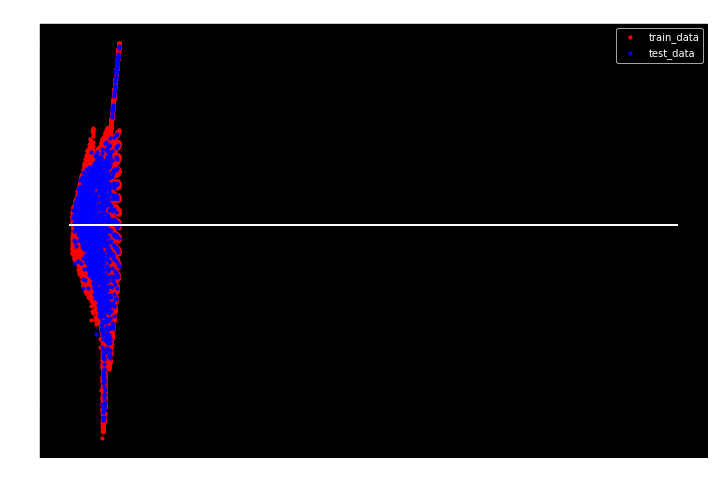

In [74]:
plt.figure(figsize=(12,8))
plt.scatter(regr.predict(X_train_dummy),regr.predict(X_train_dummy)-y_train,color="red",s=10,label="train_data")
plt.scatter(regr.predict(X_test_dummy),regr.predict(X_test_dummy)-y_test,color="blue",s=10,label="test_data")
plt.hlines(y=0,xmin=0,xmax=50,linewidths=2)
plt.legend(loc = "upper right")
plt.title("Train_Data")
plt.show()

In [75]:
score = r2_score(y_train,y_pred)
score

0.7953678372221428

In [76]:
print("Mean squared error: %.2f" % mean_squared_error(y_train,y_pred))
print("coeffient:\n",regr.coef_)
print("variance score:{}".format(regr.score(X_train_dummy,y_train)))
print("regressor_intercept:\n",regr.intercept_)

Mean squared error: 0.20
coeffient:
 [ 2.74485795e-01  1.13631411e-01 -1.53347982e-03  2.30250012e-01
  2.26979692e-08 -6.70545891e-03  5.65828013e-03  8.45556433e-03
 -8.44069237e-05  4.71747803e-03  4.13274292e-04 -1.16170141e-02
  5.39885949e-04 -1.49836006e-02  1.64160630e-02  8.59738398e-03
  7.80443606e-03  5.68169610e-03  8.12956060e-03  1.56627066e-02
 -2.00745598e-01  4.57997225e-03]
variance score:0.7953678372221428
regressor_intercept:
 -0.14047240117879412
